In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score, classification_report
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
from utils import CustomDataset, train
from torch.optim.lr_scheduler import StepLR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# from pathlib import Path
# sources_path = Path("/content/drive/MyDrive/Data")
# X_train = np.load(str(sources_path / 'X_train.npy'))
# y_train = np.load(str(sources_path / 'Data/y_train.npy'))
# X_test = np.load(str(sources_path / 'Data/X_test.npy'))
# y_test = np.load(str(sources_path / 'Data/y_test.npy'))

In [3]:
# X_train = np.load('Data/X_train.npy')
X_train = np.load('Data/doc_embeds_X_train.npy')
y_train = np.load('Data/y_train.npy')

# X_test = np.load('Data/X_test.npy')
X_test = np.load('Data/doc_embeds_X_test.npy')
y_test = np.load('Data/y_test.npy')

In [6]:
train_df = CustomDataset(X_train, y_train)
test_df = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_df, batch_size=256, shuffle=True)
test_loader = DataLoader(test_df, batch_size=256, shuffle=False)

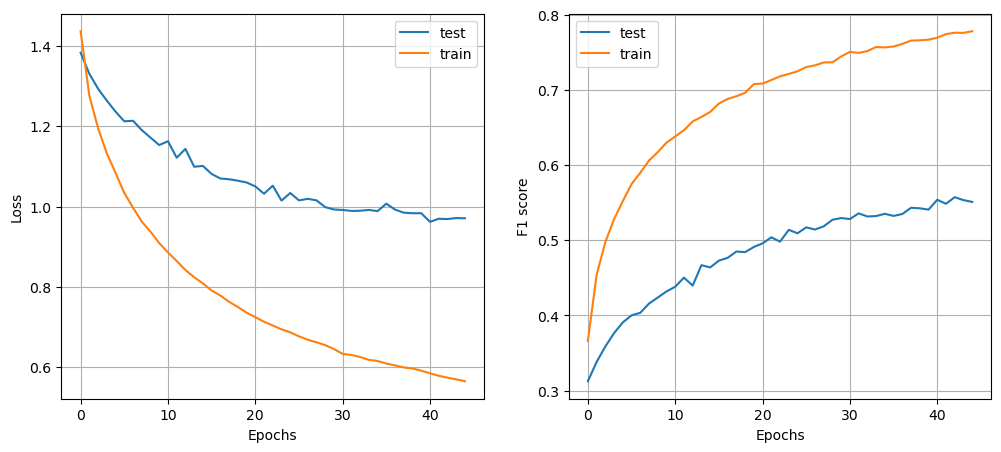

100%|██████████| 45/45 [02:12<00:00,  2.94s/it]


In [8]:
in_features = X_train.shape[1]
out_features = 5
hidden_size = 512

net = nn.Sequential(nn.BatchNorm1d(in_features),
                    nn.Linear(in_features, hidden_size), nn.BatchNorm1d(hidden_size), nn.ReLU(), nn.Dropout(0.5),
                    nn.Linear(hidden_size, out_features), nn.LogSoftmax(dim=1)).to(device)

optimizer = Adam(net.parameters(), lr=1e-4)
train(net, optimizer, train_loader, test_loader,
      epochs=45,
      saving_path='Trained_models/nn.pth')

In [154]:
# test
with torch.no_grad():
    y_pred = torch.argmax(net(torch.from_numpy(X_test).float()), dim=1).cpu().numpy() - 2
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.48      0.72      0.57       473
          -1       0.66      0.68      0.67      2746
           0       0.82      0.68      0.74      4174
           1       0.46      0.74      0.57       522
           2       0.46      0.72      0.56       105

    accuracy                           0.69      8020
   macro avg       0.58      0.71      0.62      8020
weighted avg       0.71      0.69      0.69      8020



In [170]:
# test
with torch.no_grad():
    y_pred = torch.argmax(net(torch.from_numpy(X_test).float()), dim=1).cpu().numpy() - 2
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.46      0.72      0.56       473
          -1       0.65      0.66      0.65      2746
           0       0.80      0.68      0.74      4174
           1       0.47      0.75      0.58       522
           2       0.49      0.74      0.59       105

    accuracy                           0.68      8020
   macro avg       0.57      0.71      0.62      8020
weighted avg       0.71      0.68      0.69      8020

